<a href="https://colab.research.google.com/github/N1khil-J4dhav/College/blob/main/Experiment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving IRIS.csv to IRIS (4).csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Missing values in the dataset:
sepal_length

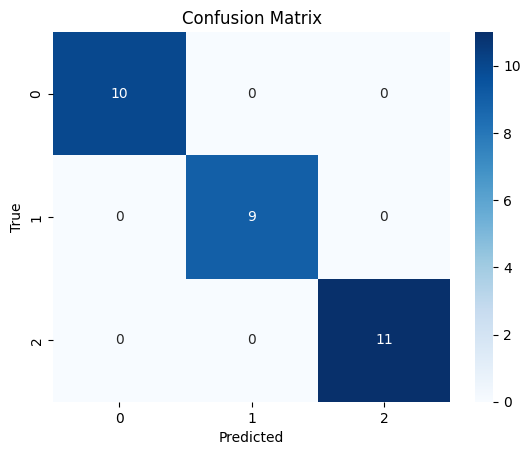

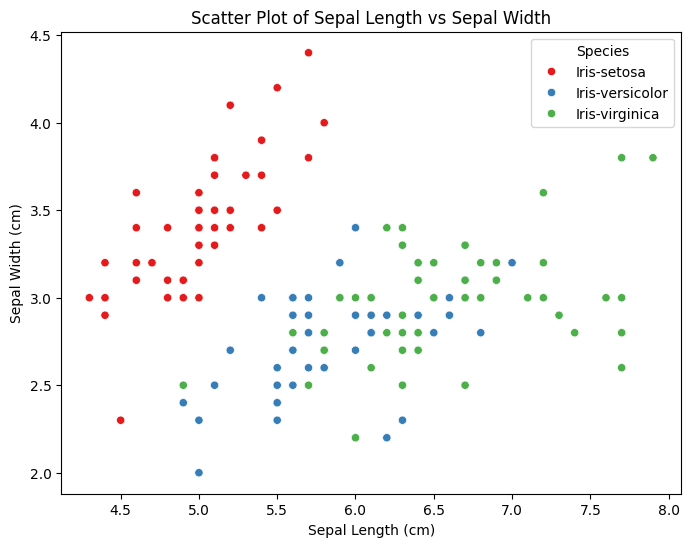

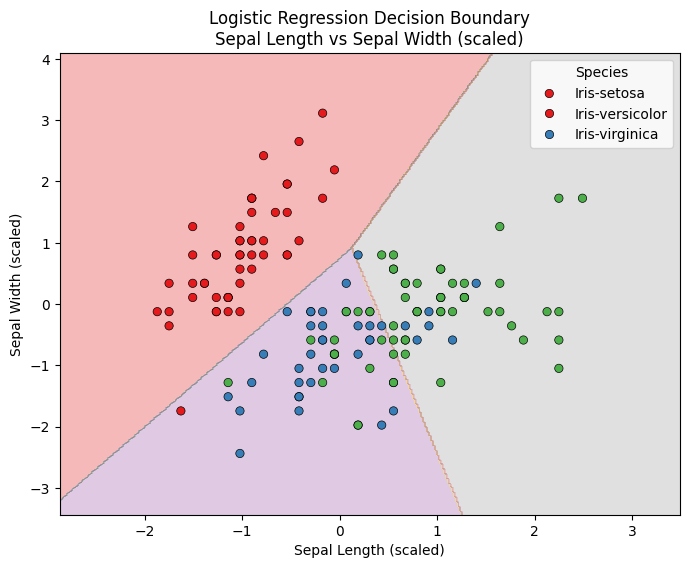


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. Load the dataset
from google.colab import files
uploaded = files.upload()

# Load the 'IRIS.csv' dataset
df = pd.read_csv('IRIS.csv')

# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Display the first few rows to understand the structure of the data
print("\nFirst few rows of the dataset:")
print(df.head())

# 2. Data Preprocessing
# Check for any missing values
print(f"\nMissing values in the dataset:\n{df.isnull().sum()}")

# Check the column names to ensure everything is correct
print(f"\nColumns in the dataset: {df.columns.tolist()}")

# 3. Feature Engineering & Scaling
# The target variable is 'species' and features are the other columns
X = df.drop('species', axis=1)  # Features
y = df['species']  # Target variable

# Check the features (X) before scaling
print(f"\nFeatures (X) before scaling:\n{X.head()}")

# Ensure that the features are numeric
print(f"\nData types of the features (X):\n{X.dtypes}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Train the Logistic Regression Model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# 6. Make predictions
y_pred = log_reg.predict(X_test)

# 7. Evaluate the model
# Accuracy
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Basic scatter plot for two features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', palette='Set1')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()
# Train Logistic Regression on only two features: sepal_length and sepal_width
X_2d = df[['sepal_length', 'sepal_width']]
y_2d = df['species']

# Scale these features
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

# Fit logistic regression
log_reg_2d = LogisticRegression(max_iter=200)
log_reg_2d.fit(X_2d_scaled, y_2d)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Map species to numeric codes for plotting
species_to_num = {label: idx for idx, label in enumerate(np.unique(y_2d))}
num_to_species = {v: k for k, v in species_to_num.items()}

# Predict class labels for each point in the grid (strings)
Z_labels = log_reg_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert string labels to numbers
Z = np.array([species_to_num[label] for label in Z_labels])
Z = Z.reshape(xx.shape)

# Convert y_2d labels to numeric for scatter plot
y_2d_num = y_2d.map(species_to_num)

# Plot the decision boundary with the scatter plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
sns.scatterplot(x=X_2d_scaled[:, 0], y=X_2d_scaled[:, 1], hue=y_2d_num, palette='Set1', edgecolor='k')
plt.title('Logistic Regression Decision Boundary\nSepal Length vs Sepal Width (scaled)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend(title='Species', labels=[num_to_species[i] for i in range(len(species_to_num))])
plt.show()



# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))